In [1]:
## Cleaning the rmpCapstoneNum.csv file.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(11022558)

In [ ]:
df = pd.read_csv("data/rmpCapstoneNum.csv")

df.columns = ["average_rating", "average_difficulty", "num_ratings", 
              "pepper", "retake", "num_online_ratings", "male", "female"]

## Here, I'm just dropping rows with missing values. 

df = df.dropna(subset=["average_rating", "average_difficulty", "num_ratings"])

## Preventing extreme averages, hence only including num_ratings greater than or equal to 5. 

df=df[df["num_ratings"] >= 5]

## Making a singular, gender column to make examining the data easier.

def gender(row):
    if row["male"] == 1:
        return "male"
    elif row["female"] == 1:
        return "female"
    else:
        return "not known"

df["gender"] = df.apply(gender, axis=1) 
        
df = df.drop(columns=["male", "female"])

df.head(10)

,average_rating,average_difficulty,num_ratings,pepper,retake,num_online_ratings,gender
2,3.6,3.5,10.0,1.0,NaN,0.0,not known
4,3.5,3.3,22.0,0.0,56.0,7.0,male
20,2.6,4.1,10.0,0.0,NaN,0.0,male
24,4.3,3.3,16.0,1.0,83.0,0.0,female
26,4.1,1.8,8.0,0.0,NaN,0.0,female
30,2.2,4.4,5.0,0.0,NaN,0.0,not known
38,3.5,3.2,20.0,1.0,NaN,0.0,male
39,1.8,3.8,15.0,0.0,22.0,1.0,female
41,4.1,3.3,21.0,0.0,67.0,0.0,female
42,4.2,2.7,8.0,1.0,NaN,1.0,female


In [3]:
## 1: Is there evidence of a pro-male gender bias in the data? 

sample = df[df["gender"].isin(["male","female"])]

sample["gender"].value_counts()

## independent-samples t-test

from scipy.stats import ttest_ind

male_ratings = sample[sample["gender"] == "male"]["average_rating"]
female_ratings = sample[sample["gender"] == "female"]["average_rating"]

print("The number of male professors are: ", len(male_ratings))
print("The number of female professors are: ", len(female_ratings))

print("The mean rating of male professors is: ", male_ratings.mean())
print("The mean rating of female professors is: ", female_ratings.mean())

The number of male professors are:  10791
The number of female professors are:  8407
The mean rating of male professors is:  3.91409507923272
The mean rating of female professors is:  3.8572974901867276


In [4]:
t_statistic, p_value = ttest_ind(male_ratings, female_ratings, equal_var=False) 

print(f"The obtained t-statistic is: {t_statistic}")
print(f"The obtained p-value is: {p_value}")

The obtained t-statistic is: 4.1863987368338025
The obtained p-value is: 2.84786029285834e-05


<AxesSubplot:xlabel='gender', ylabel='average_rating'>

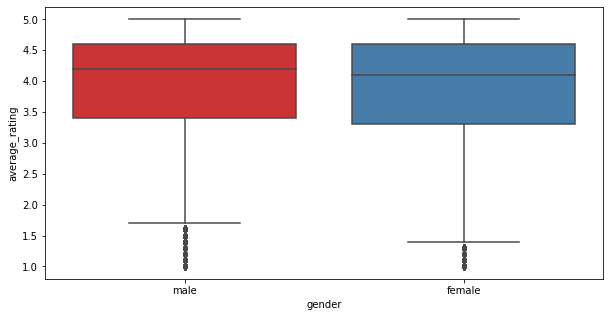

In [5]:
plt.figure(figsize=(10, 5)) ## Created a boxplot to show 
sns.boxplot(data=sample, x="gender", y="average_rating", palette="Set1")

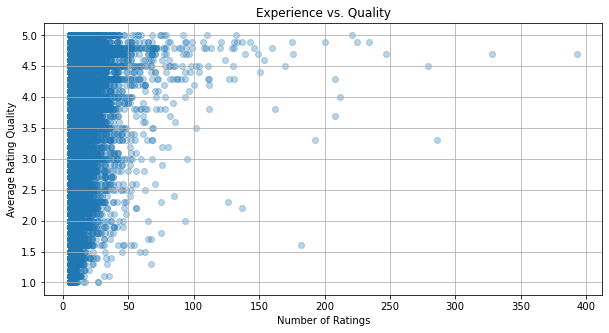

In [6]:
## 2. Does experience affect quality of teaching?

import matplotlib.pyplot as plt
from scipy.stats import pearsonr

plt.figure(figsize=(10, 5))
plt.scatter(df["num_ratings"], df["average_rating"], alpha=0.3)
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating Quality")
plt.title("Experience vs. Quality")
plt.grid(True)
plt.show() ## Scatterplot showing experience vs quality. 

In [7]:
correlation_coeff, p_value = pearsonr(df["num_ratings"], df["average_rating"])

print(f"The Pearson correlation coefficient is: {correlation_coeff}")
print(f"The p-value is: {p_value}")

The Pearson correlation coefficient is: 0.05783465397880529
The p-value is: 3.004951842641698e-20


In [8]:
## 3. What is the relationship between average rating and average difficulty?

corr_coeff, p_value = pearsonr(df["average_difficulty"], df["average_rating"])
print(f"The Pearson correlation coefficient is: {corr_coeff}")
print(f"The p-value is: {p_value}")

The Pearson correlation coefficient is: -0.6190266386205349
The p-value is: 0.0


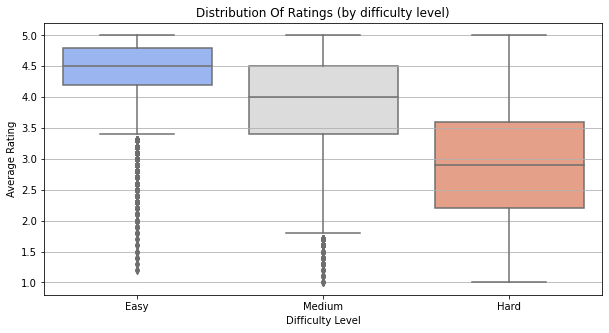

In [9]:
## Boxplot (scores -> categories)

df["difficulty_categories"] = pd.cut(df["average_difficulty"], bins=[1, 2.5, 3.5, 5], labels=["Easy", "Medium", "Hard"])

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="difficulty_categories", y="average_rating", palette="coolwarm")
plt.title("Distribution Of Ratings (by difficulty level)")
plt.xlabel("Difficulty Level")
plt.ylabel("Average Rating")
plt.grid(True, axis='y')
plt.show()

In [10]:
## 4. Do professors who teach a lot of classes in the online modality receive higher or lower ratings than those who don’t?

In [11]:
## Seperated ratings of teachers into two groups: online and offline.

online = df[df["num_online_ratings"] >= 5]["average_rating"]
offline = df[df["num_online_ratings"] == 0]["average_rating"]

In [12]:
t_statistic, p_value = ttest_ind(online, offline, equal_var=False)

print("Online group mean:", online.mean())
print("Offline group mean:", offline.mean())
print(f"The obtained t-statistic is: {t_statistic}")
print(f"The obtained p-value is: {p_value}")

Online group mean: 3.7548863636363627
Offline group mean: 3.8488946747888626
The obtained t-statistic is: -2.7312729605576442
The obtained p-value is: 0.0064262052431975055


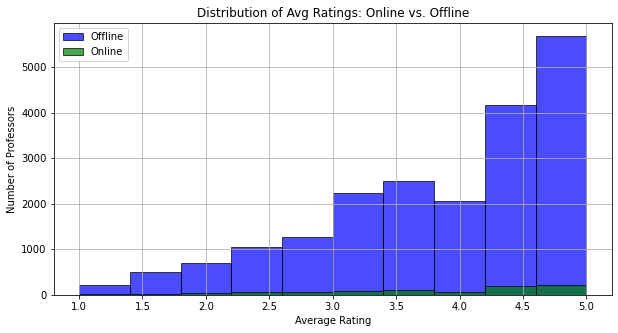

In [13]:
## Histogram comparing the ratings of online vs. offline. 

plt.figure(figsize=(10, 5))
plt.hist(offline, bins=10, alpha=0.7, label="Offline", color="blue", edgecolor="Black")
plt.hist(online, bins=10, alpha=0.7, label="Online", color="green", edgecolor="Black")

plt.title("Distribution of Avg Ratings: Online vs. Offline")
plt.xlabel("Average Rating")
plt.ylabel("Number of Professors")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
## 5. What is the relationship between the average rating and the proportion of people who would take the class the professor teaches again?

In [15]:
filtered = df[df["retake"].notna()] ## Removing NaNs from the `retake` column.

corr_coeff, p_value = pearsonr(filtered["retake"], filtered["average_rating"])

print(f"The Pearson correlation coefficient is: {corr_coeff}")
print(f"The p-value is: {p_value}")

The Pearson correlation coefficient is: 0.8803535424363594
The p-value is: 0.0


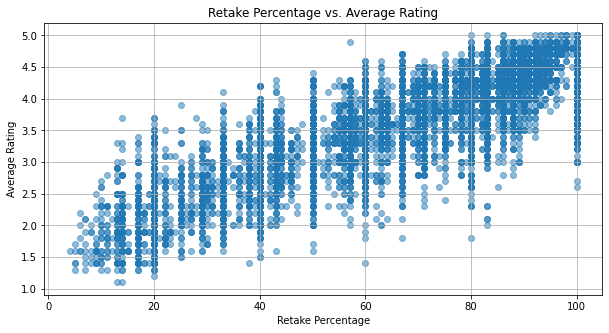

In [16]:
plt.figure(figsize=(10, 5))
plt.scatter(filtered["retake"], filtered["average_rating"], alpha=0.5)
plt.xlabel("Retake Percentage")
plt.ylabel("Average Rating")
plt.title("Retake Percentage vs. Average Rating")
plt.grid(True)
plt.show()

In [17]:
## 6. Do professors who are “hot” receive higher ratings than those who are not?

hot = df[df["pepper"] == 1]["average_rating"]
not_hot = df[df["pepper"] == 0]["average_rating"]

t_statistic, p_value = ttest_ind(hot, not_hot, equal_var=False)

print("The mean rating of 'hot' professors is: ", hot.mean())
print("The mean rating of 'not hot' professors is: ", not_hot.mean())
print(f"The obtained t-statistic is: {t_statistic}")
print(f"The obtained p-value is: {p_value}")

The mean rating of 'hot' professors is:  4.357355976731144
The mean rating of 'not hot' professors is:  3.4665737593474075
The obtained t-statistic is: 90.32281074442739
The obtained p-value is: 0.0


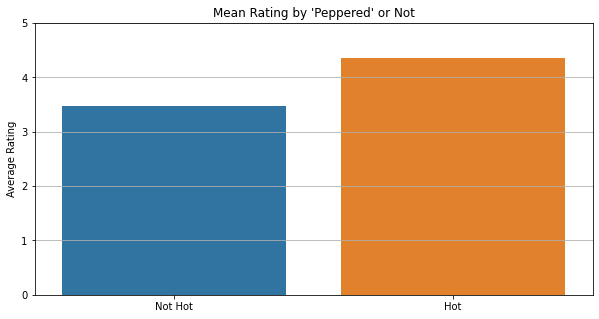

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(x=["Not Hot", "Hot"], y=[not_hot.mean(), hot.mean()])
plt.ylabel("Average Rating")
plt.title("Mean Rating by 'Peppered' or Not")
plt.ylim(0, 5)
plt.grid(True, axis='y')
plt.show()

In [19]:
## 7. Build a regression model predicting average rating from difficulty (only)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
x = df["average_difficulty"].values.reshape(-1, 1)
y = df["average_rating"]

model = LinearRegression()
model.fit(x, y)

intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(x, y)

y_pred = model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Regression Equation: average_rating = {intercept:.2f} + {slope:.2f} * average_difficulty")
print("The R^2 is:", r_squared)
print("The RMSE is:", rmse)

Regression Equation: average_rating = 5.97 + -0.73 * average_difficulty
The R^2 is: 0.38319397932183796
The RMSE is: 0.7436252757975156


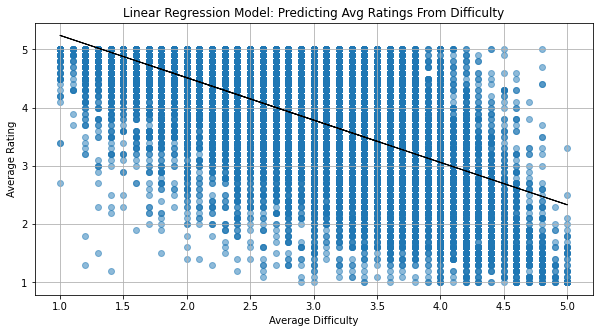

In [21]:
## I'm making a scatterplot of the data. 

plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5)

plt.plot(x, y_pred, color='black', linewidth=1)
plt.xlabel("Average Difficulty")
plt.ylabel("Average Rating")
plt.title("Linear Regression Model: Predicting Avg Ratings From Difficulty")
plt.grid(True)
plt.show()

In [22]:
## 8. Build a regression model predicting average rating from all available factors. 

df = pd.get_dummies(df, columns=["gender"], drop_first=False)
df = df.drop(columns=["gender_male"]) ## I'm keeping only `gender_female` to avoid collinearity. 

## I converted the gender variables to being dummmy ones, so I can include it within my regression model.

## Now, I will remove all the `NaN` values from my predictors. 
df_cleaned = df.dropna(subset=["average_rating", "average_difficulty", "retake", "pepper", "num_ratings", "num_online_ratings", "gender_female"])
df_cleaned = df_cleaned[df_cleaned["num_ratings"] >= 5]

x = df_cleaned[["average_difficulty", "retake", "pepper", "num_ratings", "num_online_ratings", "gender_female"]]
y = df_cleaned["average_rating"]

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [23]:
intercept = model.intercept_
coefficients = model.coef_
r_squared = model.score(x, y)

y_pred = model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Intercept:", intercept)
print("Coefficients:", coefficients)
print("R2:", r_squared)
print("RMSE:", rmse)

Intercept: 2.5266695840551674
Coefficients: [-0.19972459  0.02495228  0.20297365 -0.00021536 -0.00041451 -0.00165942]
R2: 0.8094764471137749
RMSE: 0.36935872556360116


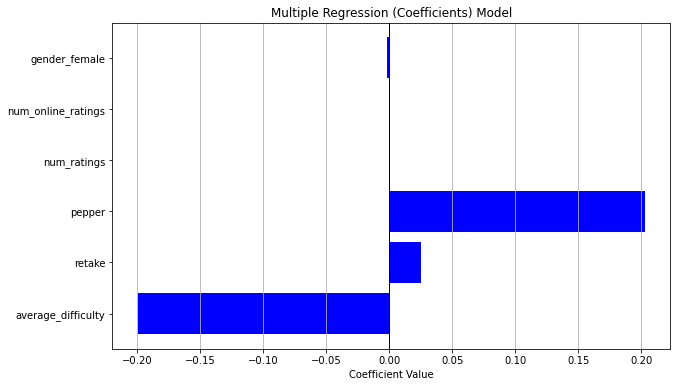

In [24]:
plt.figure(figsize=(10, 6))

features = ["average_difficulty", "retake", "pepper", "num_ratings", "num_online_ratings", "gender_female"]

plt.barh(features, coefficients, color="blue")
plt.axvline(0, color="black", linewidth=1)
plt.title("Multiple Regression (Coefficients) Model")
plt.xlabel("Coefficient Value")
plt.grid(True, axis='x')
plt.show()

In [25]:
print(list(zip(x.columns, coefficients)))

[('average_difficulty', -0.19972459044152852), ('retake', 0.02495228126925669), ('pepper', 0.20297364767788317), ('num_ratings', -0.00021535798009805066), ('num_online_ratings', -0.000414506605366681), ('gender_female', -0.0016594175394498377)]


In [26]:
## 9. Build a classification model that predicts whether a professor receives a “pepper” from average rating only.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report)

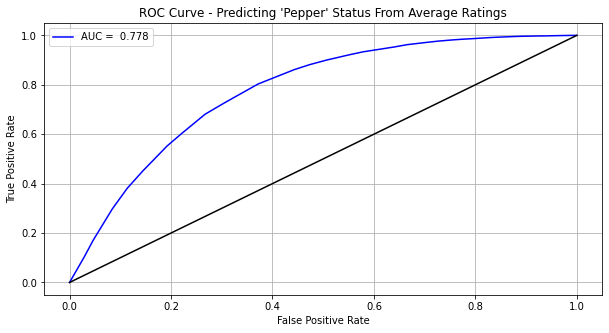

Accuracy: 0.7017502365184485
Confusion Matrix:
 [[9241 5469]
 [2097 8561]]
AUC: 0.7775942028782138


In [27]:
df_classification = df.dropna(subset=["average_rating", "pepper"])
df_classification = df_classification[df_classification["num_ratings"] >= 5]
                              
x = df_classification[["average_rating"]]
y = df_classification["pepper"]
             
model = LogisticRegression(class_weight='balanced') ## Class Weighting
model.fit(x, y)
             
y_pred = model.predict(x)
y_prob = model.predict_proba(x)[:, 1]
             
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
roc_auc_value = roc_auc_score(y, y_prob)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_prob)
             
plt.figure(figsize=(10, 5))
plt.plot(false_positive_rate, true_positive_rate, label=f"AUC = {roc_auc_value: .3f}", color="blue")
plt.plot([0, 1], [0, 1], color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Predicting 'Pepper' Status From Average Ratings")
plt.legend()
plt.grid(True)
plt.show()
             
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("AUC:", roc_auc_value)

In [28]:
## 10. Build a classification model that predicts whether a professor receives a “pepper” from all available factors.

df_pepper = df.dropna(subset=["average_rating", "average_difficulty", "retake", "pepper", "num_ratings", "num_online_ratings", "gender_female"])
df_pepper = df_pepper[df_pepper["num_ratings"] >= 5]

x = df_pepper[["average_rating", "average_difficulty", "retake", "num_ratings", "num_online_ratings", "gender_female"]]
y = df_pepper["pepper"]
              
model_total = LogisticRegression(class_weight='balanced')
model_total.fit(x, y)
              
y_pred = model_total.predict(x)
y_prob = model_total.predict_proba(x)[:, 1]
              
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
auc = roc_auc_score(y, y_prob)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("AUC:", auc)

Accuracy: 0.7201480263157894
Confusion Matrix:
 [[4270 2224]
 [1179 4487]]
AUC: 0.7978803997412258


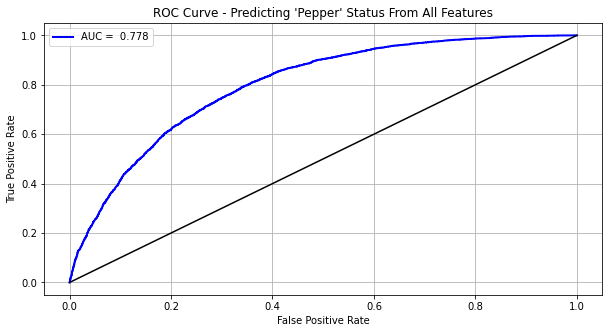

In [29]:
false_positive_rate, true_positive_rate, _ = roc_curve(y, y_prob)

plt.figure(figsize=(10, 5))
plt.plot(false_positive_rate, true_positive_rate, lw=2, label=f"AUC = {roc_auc_value: .3f}", color="blue")
plt.plot([0, 1], [0, 1], color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Predicting 'Pepper' Status From All Features")
plt.legend()
plt.grid(True)
plt.show()